In [1]:
import numpy as np;
import tensorflow as tf;
from scipy.special import softmax;
from matplotlib import pyplot as plt;

In [2]:
bs = 64;
laeeb = tf.keras.models.load_model("./laeeb/");

def map_func(image, label):
    image = tf.cast(image, tf.uint8);
    image = tf.keras.applications.vgg16.preprocess_input(image);
    return (image, label);

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory("./Dataset/test/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
test_ds = test_ds.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 6000 files belonging to 20 classes.


In [4]:
laeeb.evaluate(test_ds)

94/94 [==============================] - 140s 1s/step - loss: 0.0540 - binary_accuracy: 0.9984


[0.053975529968738556, 0.998408317565918]

In [5]:
pred = laeeb.predict(test_ds);

94/94 [==============================] - 141s 1s/step


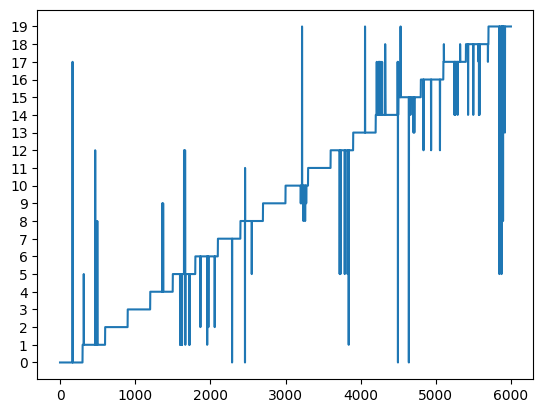

In [6]:
plt.yticks(range(20))
plt.plot(np.argmax(pred, axis=1))

In [120]:
man_test = tf.keras.utils.image_dataset_from_directory("./demo_data/mask/", label_mode="categorical", batch_size=bs, image_size=(50, 50), shuffle=False);
print([*zip(range(20), man_test.class_names)])
man_test = man_test.map(map_func, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False);

Found 6 files belonging to 20 classes.
[(0, '0'), (1, '1'), (2, '10'), (3, '11'), (4, '12'), (5, '13'), (6, '14'), (7, '15'), (8, '16'), (9, '17'), (10, '18'), (11, '19'), (12, '2'), (13, '3'), (14, '4'), (15, '5'), (16, '6'), (17, '7'), (18, '8'), (19, '9')]


[0, 1, 12, 13, 14, 15]


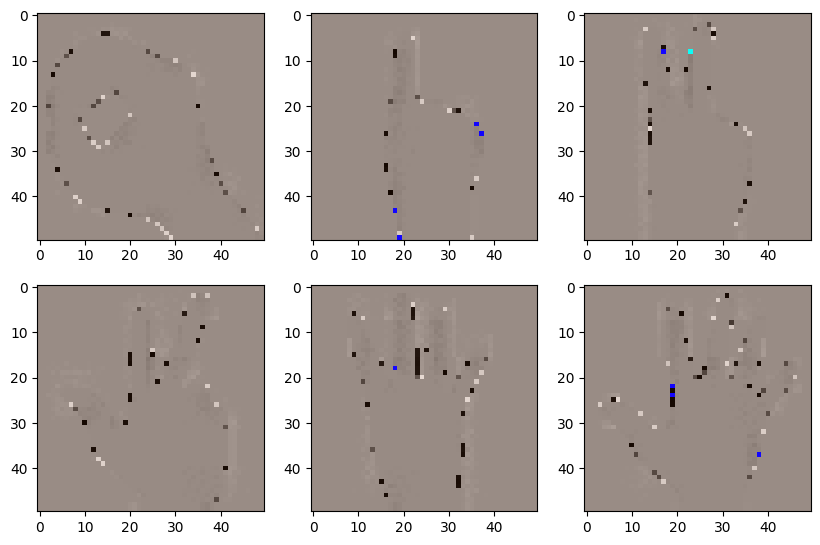

In [121]:
fig = plt.figure(figsize=(10, 10))  # width, height in inches
lbl = [];
for i in range(6):
    sub = fig.add_subplot(3, 3, i + 1)
    sub.imshow(next(iter(man_test))[0][i])
    lbl.append(np.argmax(next(iter(man_test))[1][i]));
print(lbl);
plt.show();

In [9]:
laeeb.evaluate(man_test)

1/1 [==============================] - 0s 361ms/step - loss: 1.5177 - binary_accuracy: 0.9500


[1.5177055597305298, 0.949999988079071]

In [10]:
pred = laeeb.predict(man_test)
np.argmax(pred, axis=1)

1/1 [==============================] - 0s 302ms/step


array([ 0,  1,  5, 19, 14, 13], dtype=int64)

In [4]:
import cv2;
img = cv2.imread("./demo_data/mask/0/01.jpg");
print(img.min(), img.max())
# img = tf.cast(img, tf.uint8)
img = tf.convert_to_tensor(img)
print(img.dtype)
img = tf.keras.applications.vgg16.preprocess_input(img)
img = img.numpy()
print(img.min(), img.max())
img = np.expand_dims(img, axis=0)
pred = laeeb.predict(img)

0 255
<dtype: 'uint8'>
2 221
1/1 [==============================] - 2s 2s/step


In [12]:
np.argmax(pred, axis=1)

array([7], dtype=int64)

In [122]:
zero = np.expand_dims(next(iter(man_test))[0][0], 0)

In [104]:
zero = tf.keras.applications.vgg16.preprocess_input(zero[0])
img = tf.keras.applications.vgg16.preprocess_input(img[0])

In [129]:
print(zero.min(), zero.max())
print(img.min(), img.max())

0 228
2 221


In [84]:
np.sum(zero.astype(np.int32)-img.astype(np.int32))

-1122

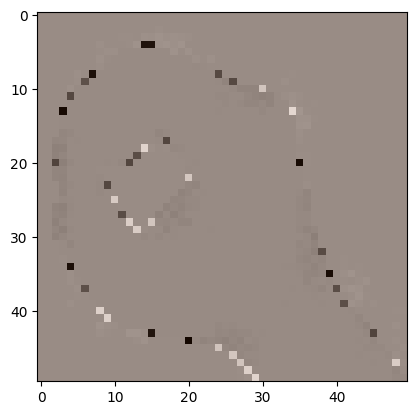

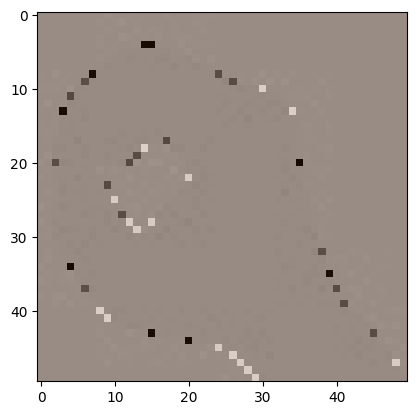

In [130]:
plt.imshow(zero[0])
plt.show()
plt.imshow(img[0])

In [116]:
laeeb.predict(zero)

1/1 [==============================] - 0s 99ms/step


array([[1.0000000e+00, 2.6898206e-24, 1.6780404e-17, 1.4591319e-08,
        8.5480471e-14, 1.5265069e-21, 1.7982123e-13, 8.8930530e-11,
        2.2698584e-15, 2.7330045e-15, 4.8159055e-19, 3.9968914e-08,
        2.1745774e-19, 2.4362232e-16, 1.1872581e-14, 5.8680425e-20,
        2.6832822e-24, 6.1874797e-17, 2.4437241e-17, 6.5162057e-19]],
      dtype=float32)

In [131]:
laeeb.predict(img)

1/1 [==============================] - 0s 87ms/step


array([[1.0000000e+00, 6.8391650e-28, 4.4664217e-19, 1.3101084e-10,
        1.2104565e-16, 2.6964883e-24, 1.7362163e-15, 9.2876401e-13,
        8.6748661e-17, 2.1249491e-19, 1.2760422e-22, 1.0521561e-09,
        4.8097660e-22, 1.0604728e-17, 3.0866507e-15, 1.6161867e-20,
        1.5213648e-25, 1.4505287e-17, 2.2920949e-18, 5.2034176e-21]],
      dtype=float32)